<a href="https://colab.research.google.com/github/ProjektVek/TCC-UNIP/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Aprendizado de máquina aplicado à detecção de fraudes de cartão de crédito:</h1></center>

---

 <center><h2>TCC 2023 - Ciência da Computação - UNIP Campinas</h2></center>

---
## Integrantes:
  <ul>
     <li><h2>Davi Ferreira Ribeiro - F21AFG6</h2></li>
     <li><h2>Ryan Vitor Rodrigues Teixeira - N662BC4</h2></li>
     <li><h2>Victor Hugo Souza Ferreira - N587FF6</h2></li>
  </ul>
</h2>






### Importando Bibliotecas:
<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>MatPlotLib</li>
<li>SciKitLearn</li>
</ul>

In [1]:
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as plot
import sklearn as skl

#faz o matplotlib renderizar no notebook
%matplotlib inline

### Lendo Arquivo CSV:

In [2]:
folder = "drive/MyDrive/TCC/"
archive = "creditcard.csv"
csv_dataset = pnd.read_csv(folder+archive)

In [3]:
csv_dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Análise dos Dados:

In [4]:
# Importando biblioteca squarify, que auxiliará na geração de gráficos
!pip install squarify
import squarify

In [5]:
# Contando o número de fraudes e de transções válidas:
all_transactions_numbers = csv_dataset.Amount.count()
fraud_numbers = csv_dataset.Amount[csv_dataset.Class==1].count()
valid_numbers = csv_dataset.Amount[csv_dataset.Class==0].count()

In [6]:
print("Quantidade de transações: " + str(all_transactions_numbers))
print("Quantidade de fraudes: " + str(fraud_numbers))
print("Quantidade de transações válidas: " + str(valid_numbers), end="\n")

Quantidade de transações: 284807
Quantidade de fraudes: 492
Quantidade de transações válidas: 284315


In [7]:
fraud_percentage = fraud_numbers/all_transactions_numbers
valid_percentage = valid_numbers/all_transactions_numbers

In [8]:
print(f'Porcentagem de fraudes: {"{:.2f}".format(fraud_percentage*100)}%')
print(f'Porcentagem de transações válidas: {"{:.2f}".format(valid_percentage*100)}%')

Porcentagem de fraudes: 0.17%
Porcentagem de transações válidas: 99.83%


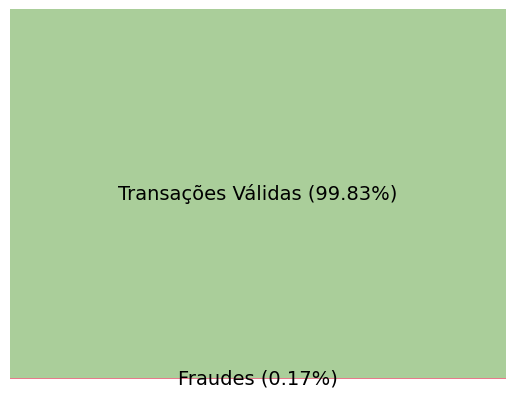

In [ ]:
# Gerando o gráfico: quantidade de fraudes vs transações válidas (Treemap)
quantities = [fraud_percentage, valid_percentage]
labels = [f'Fraudes ({"{:.2f}".format(fraud_percentage*100)}%)',
          f'Transações Válidas ({"{:.2f}".format(valid_percentage*100)}%)']
colors = ['#de425b', '#87ba70']

plot.rc('font', size=14)
squarify.plot(sizes=quantities, label=labels, color=colors, alpha=0.7)
plot.axis('off')

plot.show()

### Distribuição dos Dados no tempo:

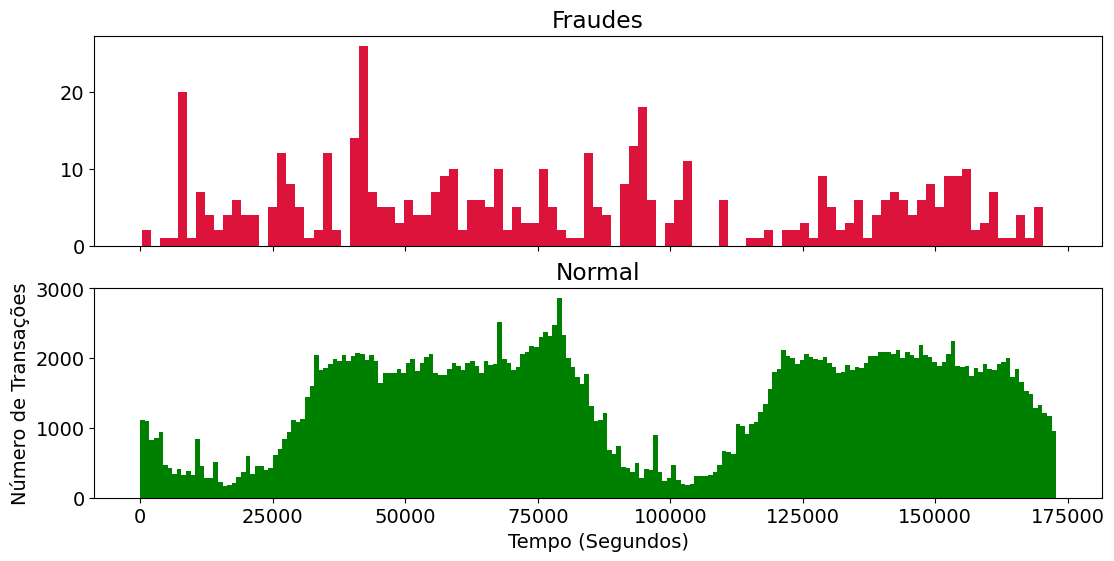

In [ ]:
figure, (axe1, axe2) = plot.subplots(2, 1, sharex=True, figsize=(13,6))

axe1.hist(csv_dataset.Time[csv_dataset.Class==1], bins=100, color='crimson')
axe1.set_title('Fraudes')

axe2.hist(csv_dataset.Time[csv_dataset.Class==0], bins=200, color='green')
axe2.set_title('Normal')

plot.xlabel('Tempo (Segundos)')
plot.ylabel('Número de Transações')
plot.show()


### Valor das Transações:

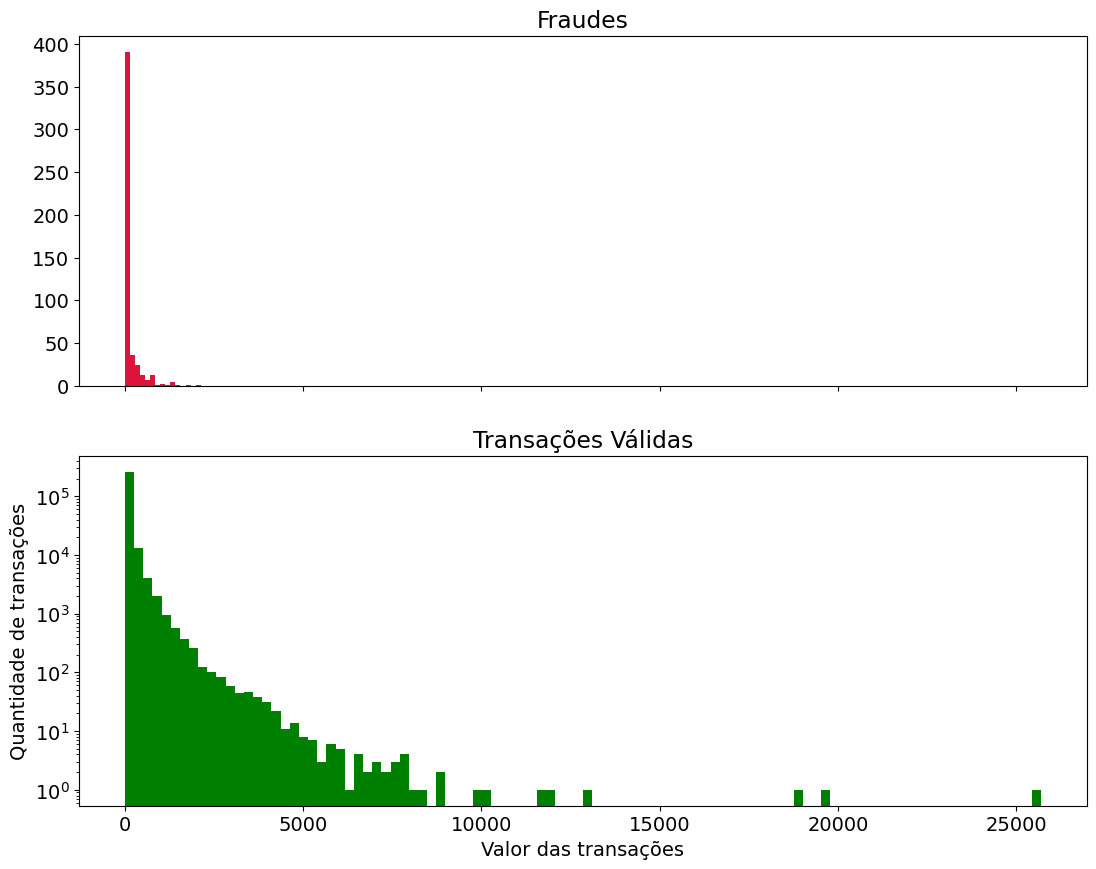

In [ ]:
figure, axes = plot. subplots(nrows=2, ncols=1, sharex=True, figsize=(13,10))
axe1, axe2 = axes.flatten()

axe1.hist(csv_dataset.Amount[csv_dataset.Class==1], bins = 15, color='crimson')
axe1.set_title('Fraudes')

axe2.hist(csv_dataset.Amount[csv_dataset.Class==0], bins = 100, color='green')
axe2.set_title('Transações Válidas')

plot.xlabel('Valor das transações')
plot.ylabel('Quantidade de transações')
plot.yscale('log')
#figure.tight_layout()
plot.show()

### Comparação das características anonimizadas:

In [9]:
import matplotlib.gridspec as grid
import seaborn as sb

<ipython-input-9-32001c94339d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(csv_dataset[char_name][csv_dataset.Class==1], bins=60, color='crimson')
<ipython-input-9-32001c94339d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(csv_dataset[char_name][csv_dataset.Class==0], bins=60, color='gree

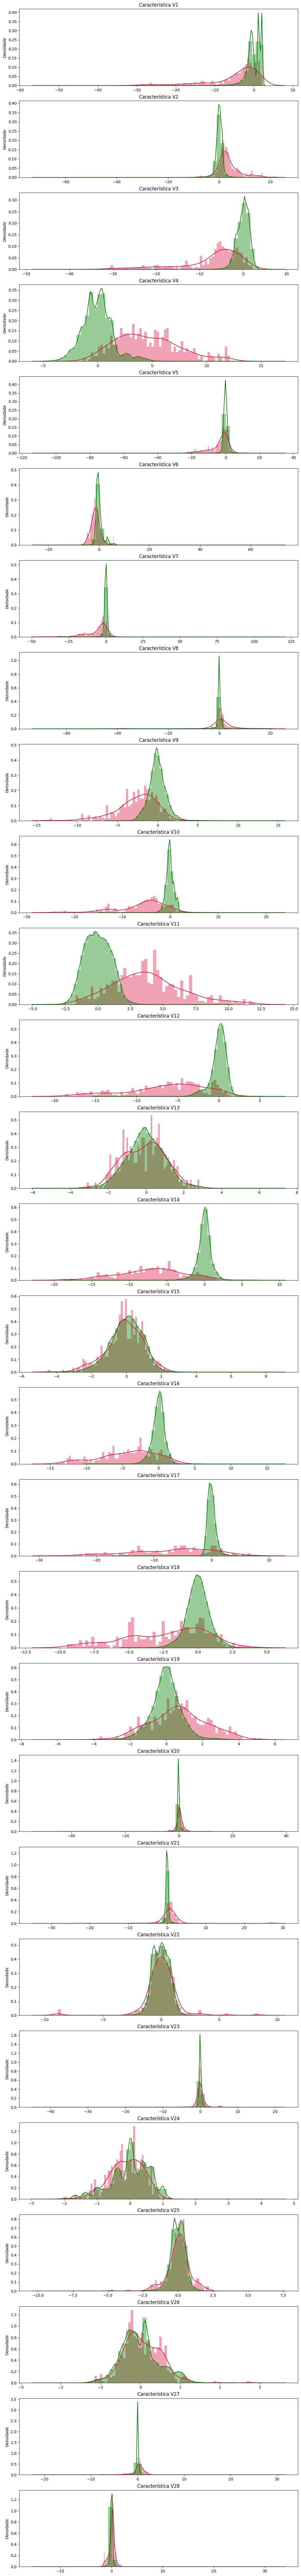

In [ ]:
anom_features = csv_dataset.iloc[:,1:29].columns

plot.figure(figsize=(13,120))
gridspec = grid.GridSpec(28,1)

for i, char_name in enumerate(csv_dataset[anom_features]):
  axe = plot.subplot(gridspec[i])
  sb.distplot(csv_dataset[char_name][csv_dataset.Class==1], bins=60, color='crimson')
  sb.distplot(csv_dataset[char_name][csv_dataset.Class==0], bins=60, color='green')
  axe.set_xlabel('')
  axe.set_ylabel('Densidade')
  axe.set_title(f'Característica {char_name}')
plot.show()

### Separando dados:

In [10]:
frauds = csv_dataset[csv_dataset.Class==1]
valid_transactions = csv_dataset[csv_dataset.Class==0]

In [11]:
print(len(frauds))
print(len(valid_transactions))

492
284315


In [12]:
# Separando 80% das fraudes para treinar o algoritmo e 20% para testes
fraud_train = frauds.sample(frac=0.8)
fraud_test = frauds.loc[~frauds.index.isin(fraud_train.index)]
print(len(fraud_train))
print(len(fraud_test))

394
98


In [13]:
from sklearn.utils import shuffle

In [14]:
# Embaralhando os dataframes para treinar em ordem aleatória
fraud_train = shuffle(fraud_train)
fraud_test = shuffle(fraud_test)
print(len(fraud_train))
print(len(fraud_test))

394
98


In [15]:
# Embaralhar e separar 500, 1000, e 3000 arquivos de transações válidas
valid_train = shuffle(valid_transactions)
valid_train = valid_train[:4500]

valid_train_500 = valid_train[:500]
valid_train_1000 = valid_train[500:1500]
valid_train_3000 = valid_train[1500:4500]
print(len(valid_train_500))
print(len(valid_train_1000))
print(len(valid_train_3000))

valid_test = valid_transactions.loc[~valid_transactions.index.isin(valid_train.index)]
print(len(valid_test))

500
1000
3000
279815


In [16]:
# Remover as colunas que não farão diferença no treinamento
data_train_500 = shuffle(pnd.concat([valid_train_500, fraud_train]))
class_train_500 = data_train_500.Class
# Deixando apenas as colunas: V1,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19
data_train_500.drop(columns=['Time', 'V5', 'V6', 'V7','V8','V13','V15', 'V20','V21','V22','V23', 'V24','V25','V26','V27','V28','Amount','Class'], inplace=True)
data_train_500.info()
# Remover as colunas que não farão diferença no treinamento
data_train_1000 = shuffle(pnd.concat([valid_train_1000, fraud_train]))
class_train_1000 = data_train_1000.Class
# Deixando apenas as colunas: V1,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19
data_train_1000.drop(columns=['Time', 'V5', 'V6', 'V7','V8','V13','V15', 'V20','V21','V22','V23', 'V24','V25','V26','V27','V28','Amount','Class'], inplace=True)

# Remover as colunas que não farão diferença no treinamento
data_train_3000 = shuffle(pnd.concat([valid_train_3000, fraud_train]))
class_train_3000 = data_train_3000.Class
# Deixando apenas as colunas: V1,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19
data_train_3000.drop(columns=['Time', 'V5', 'V6', 'V7','V8','V13','V15', 'V20','V21','V22','V23', 'V24','V25','V26','V27','V28','Amount','Class'], inplace=True)

fraud_test_class = fraud_test.Class
fraud_test.drop(columns=['Time', 'V5', 'V6', 'V7','V8','V13','V15', 'V20','V21','V22','V23', 'V24','V25','V26','V27','V28','Amount','Class'], inplace=True)

valid_test_class = valid_test.Class
valid_test.drop(columns=['Time', 'V5', 'V6', 'V7','V8','V13','V15', 'V20','V21','V22','V23', 'V24','V25','V26','V27','V28','Amount','Class'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 267064 to 229730
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      894 non-null    float64
 1   V2      894 non-null    float64
 2   V3      894 non-null    float64
 3   V4      894 non-null    float64
 4   V9      894 non-null    float64
 5   V10     894 non-null    float64
 6   V11     894 non-null    float64
 7   V12     894 non-null    float64
 8   V14     894 non-null    float64
 9   V16     894 non-null    float64
 10  V17     894 non-null    float64
 11  V18     894 non-null    float64
 12  V19     894 non-null    float64
dtypes: float64(13)
memory usage: 97.8 KB


<ipython-input-16-3bf8e88f85f0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_test.drop(columns=['Time', 'V5', 'V6', 'V7','V8','V13','V15', 'V20','V21','V22','V23', 'V24','V25','V26','V27','V28','Amount','Class'], inplace=True)


### Treinando Modelos:

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import joblib

#### Naive Bayes Gaussiano:

In [19]:
# Treinar com o modelo Gausian Naives Bayes
test = pnd.concat([fraud_test, valid_test[:102]])
test_class = pnd.concat([fraud_test_class, valid_test_class[:102]])

model_folder = "drive/MyDrive/TCC/modelos/"

In [20]:
GNB = GaussianNB()
GNB.fit(data_train_500, class_train_500)
predict_gausian_500 = GNB.predict(test)
print(f'Accuracy 500 transações válidas: {accuracy_score(test_class, predict_gausian_500)}')

Accuracy 500 transações válidas: 0.91


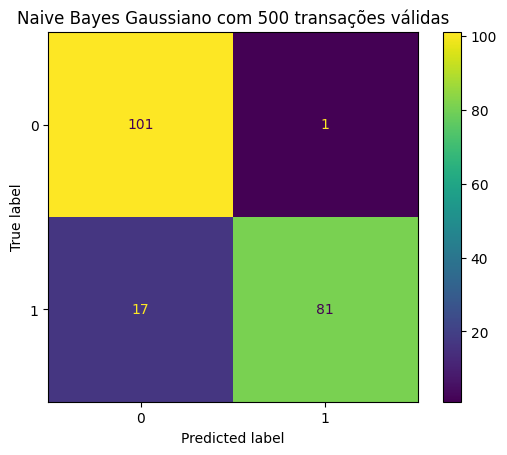

In [30]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_gausian_500)
plot.title('Naive Bayes Gaussiano com 500 transações válidas')
plot.show()

In [ ]:
model_archive = "gaussian_nb_500.pkl"
joblib.dump(GNB, (model_folder + model_archive))

In [26]:
GNB = GaussianNB()
GNB.fit(data_train_1000, class_train_1000)
predict_gausian_1000 = GNB.predict(test)
print(f'Accuracy 1000 transações válidas: {accuracy_score(test_class, predict_gausian_1000)}')

Accuracy 1000 transações válidas: 0.9


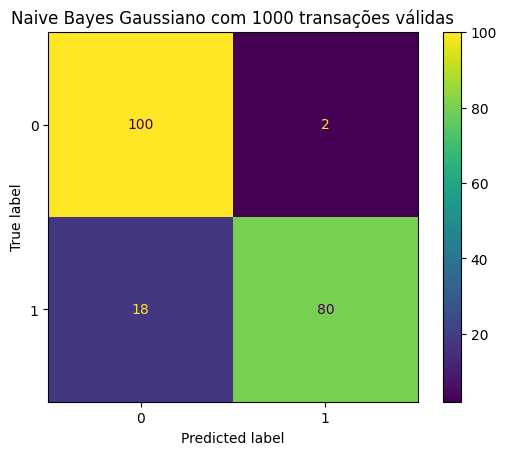

In [31]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_gausian_1000)
plot.title('Naive Bayes Gaussiano com 1000 transações válidas')
plot.show()

In [ ]:
model_archive = "gaussian_nb_1000.pkl"
joblib.dump(GNB, (model_folder + model_archive))

In [28]:
GNB = GaussianNB()
GNB.fit(data_train_3000, class_train_3000)
predict_gausian_3000 = GNB.predict(test)
print(f'Accuracy 3000 transações válidas: {accuracy_score(test_class, predict_gausian_3000)}')

Accuracy 3000 transações válidas: 0.905


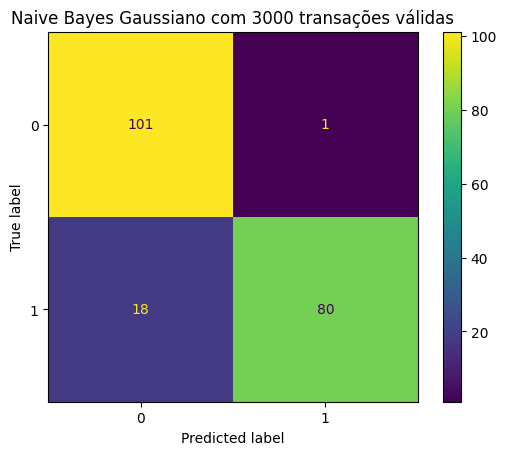

In [32]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_gausian_3000)
plot.title('Naive Bayes Gaussiano com 3000 transações válidas')
plot.show()

In [ ]:
model_archive = "gaussian_nb_3000.pkl"
joblib.dump(GNB, (model_folder + model_archive))

Accuracy 500 transações válidas: 0.93
Accuracy 1000 transações válidas: 0.93
Accuracy 3000 transações válidas: 0.93


['drive/MyDrive/TCC/modelos/gaussian_nb_3000.pkl']

In [ ]:
# Treinar com o modelo K-nearest neighbor
test = pnd.concat([fraud_test, valid_test[:102]])
test_class = pnd.concat([fraud_test_class, valid_test_class[:102]])

In [ ]:
# Algoritmo para decidir qual é o melhor k baseado em accuracy
scores = []
for k in range(1,31):
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(data_train_3000, class_train_3000)
   predict_knn_3000 = knn.predict(test)
   scores.append(f'n = {k}; {(accuracy_score(test_class, predict_knn_3000))*100}%')

for string in scores:
  print(string)

n = 1; 93.0%
n = 2; 93.0%
n = 3; 93.5%
n = 4; 93.0%
n = 5; 93.0%
n = 6; 93.0%
n = 7; 93.0%
n = 8; 93.0%
n = 9; 93.0%
n = 10; 93.0%
n = 11; 93.0%
n = 12; 92.5%
n = 13; 93.0%
n = 14; 92.5%
n = 15; 92.5%
n = 16; 92.5%
n = 17; 92.5%
n = 18; 92.5%
n = 19; 92.5%
n = 20; 92.0%
n = 21; 92.0%
n = 22; 92.0%
n = 23; 92.0%
n = 24; 92.0%
n = 25; 92.0%
n = 26; 91.5%
n = 27; 92.0%
n = 28; 91.5%
n = 29; 91.5%
n = 30; 91.0%


In [33]:
# n_neighbors padrão (5) se mostrou ter a acurácia máxima do algoritmo, portanto usaremos o padrão
knn = KNeighborsClassifier()
knn.fit(data_train_500, class_train_500)
predict_knn_500 = knn.predict(test)
print(f'Accuracy 500 transações válidas: {accuracy_score(test_class, predict_knn_500)}')

Accuracy 500 transações válidas: 0.925


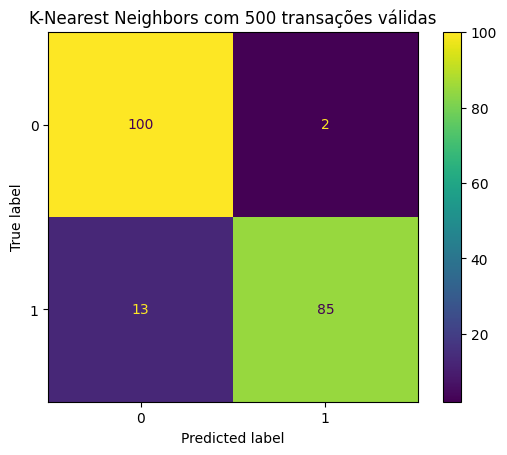

In [34]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_knn_500)
plot.title('K-Nearest Neighbors com 500 transações válidas')
plot.show()

In [ ]:
model_archive = "K_Nearest_Neighbors_500.pkl"
joblib.dump(knn, (model_folder + model_archive))

In [35]:
knn = KNeighborsClassifier()
knn.fit(data_train_1000, class_train_1000)
predict_knn_1000 = knn.predict(test)
print(f'Accuracy 1000 transações válidas: {accuracy_score(test_class, predict_knn_1000)}')

Accuracy 1000 transações válidas: 0.92


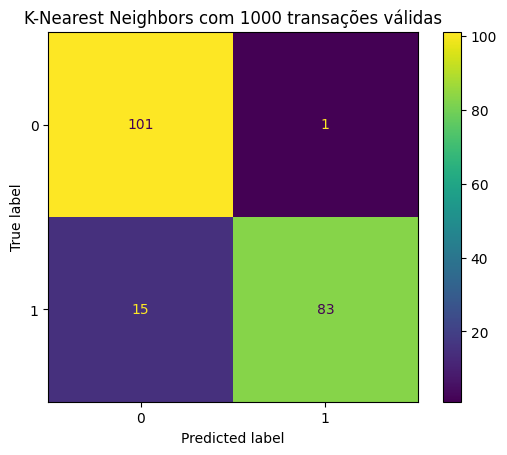

In [36]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_knn_1000)
plot.title('K-Nearest Neighbors com 1000 transações válidas')
plot.show()

In [ ]:
model_archive = "K_Nearest_Neighbors_1000.pkl"
joblib.dump(knn, (model_folder + model_archive))

In [37]:
knn = KNeighborsClassifier()
knn.fit(data_train_3000, class_train_3000)
predict_knn_3000 = knn.predict(test)
print(f'Accuracy 3000 transações válidas: {accuracy_score(test_class, predict_knn_3000)}')

Accuracy 3000 transações válidas: 0.915


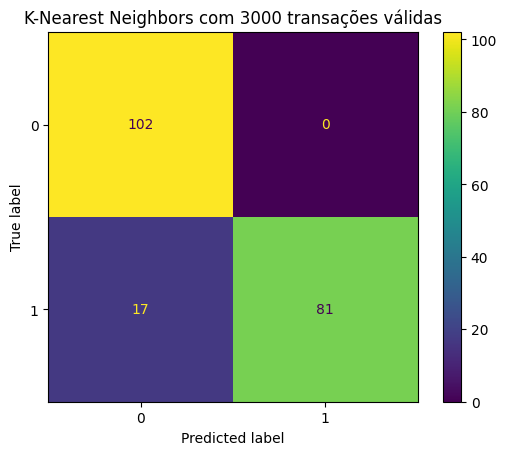

In [39]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_knn_3000)
plot.title('K-Nearest Neighbors com 3000 transações válidas')
plot.show()

In [ ]:
model_folder = "drive/MyDrive/TCC/modelos/"
model_archive = "K_Nearest_Neighbors_3000.pkl"
joblib.dump(knn, (model_folder + model_archive))

Accuracy 500 transações válidas: 0.925
Accuracy 1000 transações válidas: 0.93
Accuracy 3000 transações válidas: 0.93


['drive/MyDrive/TCC/modelos/K_Nearest_Neighbors_3000.pkl']

In [40]:
# Treinar com o modelo Support Vector Classification
test = pnd.concat([fraud_test, valid_test[:102]])
test_class = pnd.concat([fraud_test_class, valid_test_class[:102]])

In [41]:
svc = SVC()
svc.fit(data_train_500, class_train_500)
predict_svc_500 = svc.predict(test)
print(f'Accuracy 500 transações válidas: {accuracy_score(test_class, predict_svc_500)}')

Accuracy 500 transações válidas: 0.915


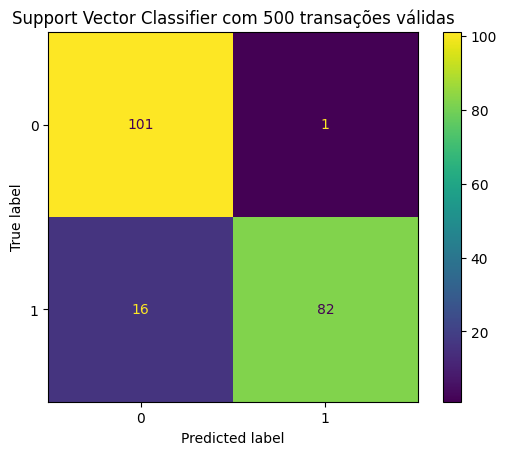

In [42]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_svc_500)
plot.title('Support Vector Classifier com 500 transações válidas')
plot.show()

In [ ]:
model_archive = "svc_500.pkl"
joblib.dump(svc, (model_folder + model_archive))

In [43]:
svc = SVC()
svc.fit(data_train_1000, class_train_1000)
predict_svc_1000 = svc.predict(test)
print(f'Accuracy 1000 transações válidas: {accuracy_score(test_class, predict_svc_1000)}')

Accuracy 1000 transações válidas: 0.91


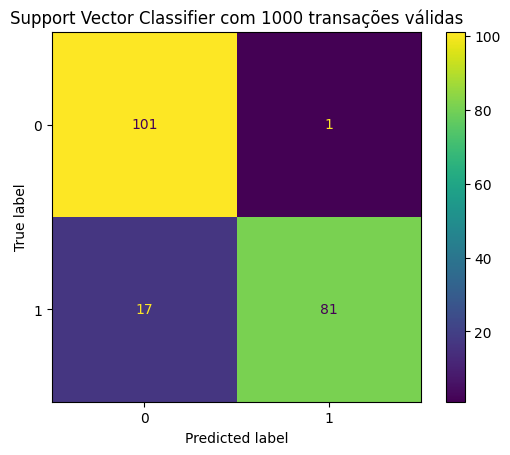

In [46]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_svc_1000)
plot.title('Support Vector Classifier com 1000 transações válidas')
plot.show()

In [ ]:
model_archive = "svc_1000.pkl"
joblib.dump(svc, (model_folder + model_archive))

In [45]:
svc = SVC()
svc.fit(data_train_3000, class_train_3000)
predict_svc_3000 = svc.predict(test)
print(f'Accuracy 3000 transações válidas: {accuracy_score(test_class, predict_svc_3000)}')

Accuracy 3000 transações válidas: 0.905


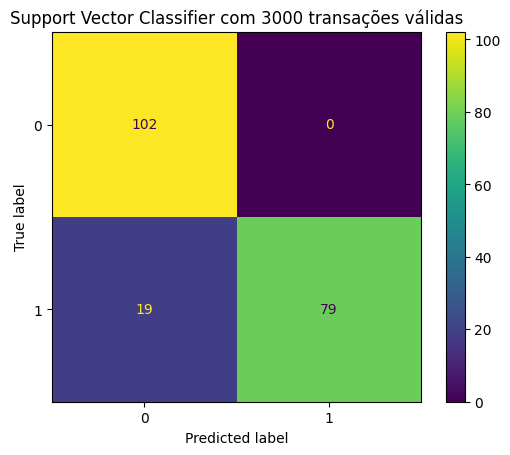

In [47]:
ConfusionMatrixDisplay.from_predictions(test_class, predict_svc_3000)
plot.title('Support Vector Classifier com 3000 transações válidas')
plot.show()

In [ ]:
model_folder = "drive/MyDrive/TCC/modelos/"
model_archive = "svc_3000.pkl"
joblib.dump(svc, (model_folder + model_archive))

Accuracy 500 transações válidas: 0.93
Accuracy 1000 transações válidas: 0.925
Accuracy 3000 transações válidas: 0.91


['drive/MyDrive/TCC/modelos/svc_3000.pkl']

### Testando Desempenho dos modelos:

In [ ]:
import time

In [ ]:
def measureTime(path: str):
  model = joblib.load(path)

  start_time = time.time()
  model.predict(test.sample())
  end_time = time.time()
  execution_time = end_time - start_time

  print(f'Tempo de execução: {execution_time} Segundos; {execution_time*1000} MiliSegundos')

In [ ]:
model_folder = "drive/MyDrive/TCC/modelos/"

model_archive = "gaussian_nb_500.pkl"
print("\nGaussian Naive Bayes, 500 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "gaussian_nb_1000.pkl"
print("\nGaussian Naive Bayes, 1000 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "gaussian_nb_3000.pkl"
print("\nGaussian Naive Bayes, 3000 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "K_Nearest_Neighbors_500.pkl"
print("\nK-Nearest Neighbors, 500 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "K_Nearest_Neighbors_1000.pkl"
print("\nK-Nearest Neighbors, 1000 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "K_Nearest_Neighbors_3000.pkl"
print("\nK-Nearest Neighbors, 3000 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "svc_500.pkl"
print("\nSupport Vector Classifier, 500 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "svc_1000.pkl"
print("\nSupport Vector Classifier, 1000 transações Válidas: ")
measureTime(model_folder + model_archive)

model_archive = "svc_3000.pkl"
print("\nSupport Vector Classifier, 3000 transações Válidas: ")
measureTime(model_folder + model_archive)


Gaussian Naive Bayes, 500 transações Válidas: 
Tempo de execução: 0.0034880638122558594 Segundos; 3.4880638122558594 MiliSegundos

Gaussian Naive Bayes, 1000 transações Válidas: 
Tempo de execução: 0.0015676021575927734 Segundos; 1.5676021575927734 MiliSegundos

Gaussian Naive Bayes, 3000 transações Válidas: 
Tempo de execução: 0.0015621185302734375 Segundos; 1.5621185302734375 MiliSegundos

K-Nearest Neighbors, 500 transações Válidas: 
Tempo de execução: 0.003814697265625 Segundos; 3.814697265625 MiliSegundos

K-Nearest Neighbors, 1000 transações Válidas: 
Tempo de execução: 0.00193023681640625 Segundos; 1.93023681640625 MiliSegundos

K-Nearest Neighbors, 3000 transações Válidas: 
Tempo de execução: 0.002213716506958008 Segundos; 2.213716506958008 MiliSegundos

Support Vector Classifier, 500 transações Válidas: 
Tempo de execução: 0.0015869140625 Segundos; 1.5869140625 MiliSegundos

Support Vector Classifier, 1000 transações Válidas: 
Tempo de execução: 0.0012826919555664062 Segundos

In [ ]:
test

,V1,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19
252774,-1.201398,4.864535,-8.328823,7.652399,-4.367228,-5.533443,4.106405,-6.331825,-12.156587,-2.110863,-1.558545,0.195992,0.502453
150660,-6.185857,7.102985,-13.030455,8.010823,-4.248307,-12.965481,8.688308,-17.182918,-14.116156,-12.375334,-18.716765,-6.522015,3.517955
42784,-10.940739,6.261586,-14.182339,7.183602,-6.294029,-13.608143,7.127165,-12.611004,-13.906297,-11.125739,-19.716257,-7.552789,3.656787
190368,-2.272473,2.935226,-4.871394,2.419012,-1.297262,-5.487425,2.969240,-3.055405,-7.862809,-1.932316,-2.284748,0.324787,-0.183181
154286,-1.465316,-1.093377,-0.059768,1.064785,1.992110,1.785922,1.368585,-1.471697,3.442422,-1.626129,1.418215,-1.417917,-1.651766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.232996,0.189454,0.491040,0.633673,0.075921,-0.066060,-0.255743,0.255157,0.284677,0.315891,-0.411940,-0.511912,-0.120427
100,1.156939,0.037215,0.556799,0.519507,0.011252,0.105584,1.612099,0.354493,0.796995,0.222868,-0.229199,-0.364809,-0.254105
101,-0.770196,0.483572,1.901072,-0.001876,-0.136666,-0.842508,-0.408235,0.503047,-0.200013,-0.323595,-0.022104,-0.796684,-0.479505
102,0.298503,2.142722,-1.542143,1.561332,0.328636,0.127497,1.612799,-0.096377,-4.318378,0.404687,2.729168,1.115864,-0.703814


In [ ]:
from os import listdir

model_folder = "drive/MyDrive/TCC/modelos/"
archives = listdir(model_folder)

execution_time_list = []
for archive in archives:
  model = joblib.load(model_folder + archive)
  temp_test = test.copy()
  while len(temp_test) > 0:
    row = temp_test.sample()

    start_time = time.time()
    model.predict(row)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_time_list.append(execution_time)

    temp_test.drop(row.index, axis=0, inplace=True)

average_time = sum(execution_time_list)/len(execution_time_list)
print(f'Tempo médio de execução: {average_time} Segundos; {average_time*1000} Milisegundos')

Tempo médio de execução: 0.0010528798898061117 Segundos; 1.0528798898061116 Milisegundos
